In [1]:
import random
from pathlib import Path

import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.models.detection import (FasterRCNN_ResNet50_FPN_Weights,
                                          RetinaNet_ResNet50_FPN_Weights)
from tqdm import tqdm

from src.DIBA import *
from src.models import *
from utils.metrics import *
from utils.utils import *

In [2]:
if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"

device = torch.device(dev)

In [3]:
random.seed(10)
torch.manual_seed(10)

In [4]:
architecture = 'Faster'
if architecture == 'Faster':
    weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
    
    core_model = Faster_DIBA()
    core_model.eval()    
    core_model = core_model.to(device)

    # initialize metric model
    metric_model = Faster_DIBA()
    metric_model.eval()
    metric_model = metric_model.to(device)

elif architecture == 'Retina':
    weights = RetinaNet_ResNet50_FPN_Weights.DEFAULT
    
    core_model = Retina_DIBA()
    core_model.eval()    
    core_model = core_model.to(device)

    # initialize metric model
    metric_model = Retina_DIBA()
    metric_model.eval()
    metric_model = metric_model.to(device)


In [5]:
scale_shape = 224
k = 3*scale_shape*scale_shape
gamma = 1e4/k
beta = 1e6/k
sigma = 1e4/k

In [6]:
img = torchvision.io.read_image('img/demo_img.png')
img = weights.transforms()(img)
img = transforms.Resize((scale_shape,scale_shape))(img)
img = img[:-1,:,:]
img = img[None,...]
img = img.to(device)

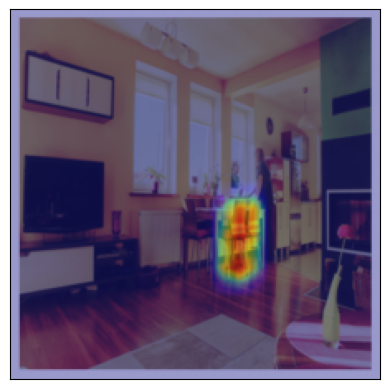

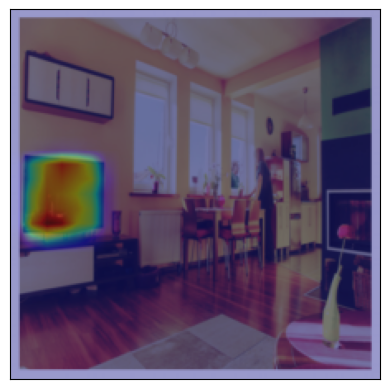

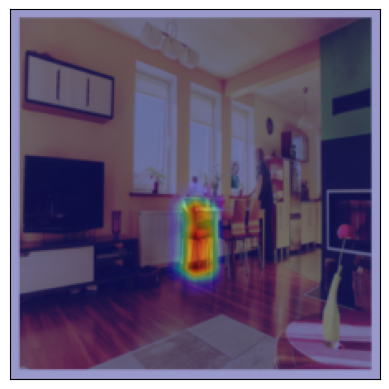

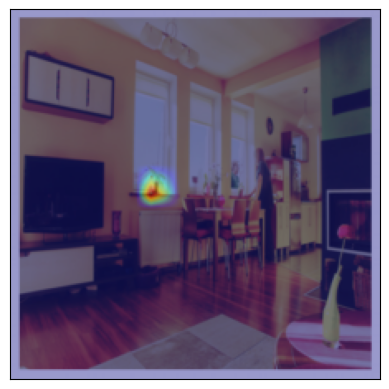

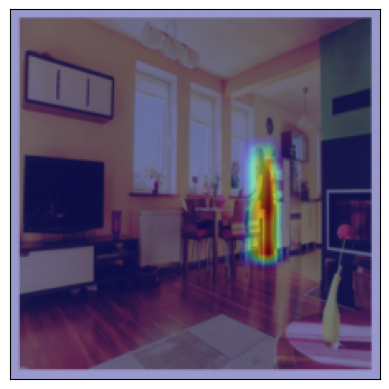

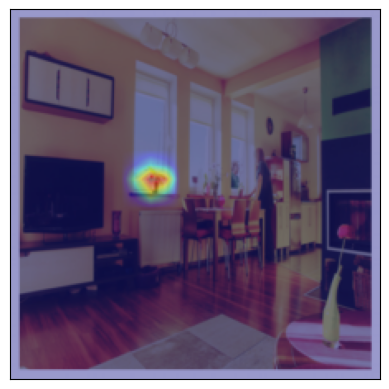

In [7]:
train_bottleneck(model = core_model, metric_model = metric_model, img = img, gamma = gamma, sigma = sigma, beta = beta, scale_shape=scale_shape, epochs=20, run_metrics=False)